<a href="https://colab.research.google.com/github/msrana172/The-Sparks-Foundation-Internship-Task/blob/main/The_Sparks_Foundation_Internship_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **To Explore Supervised Machine Learning**

***Design By - Mahaveer Singh***

#### Importing all required libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

#### Reading data from remote link

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [3]:
# First 5 records
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# calculate the shape of data
df.shape

(25, 2)

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
#for print the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [8]:
df['Hours'].isnull().sum()

0

In [9]:
df['Scores'].isnull().sum()

0

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

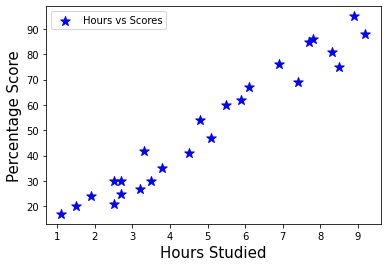

In [10]:
plt.scatter(df.Hours, df.Scores, color = "blue", s = 100, label = "Hours vs Scores",marker="*")
plt.xlabel("Hours Studied", fontsize=15)
plt.ylabel("Percentage Score", fontsize=15)
plt.legend()
plt.show()

In [11]:
#Independent Variable
X = df.iloc[:, :-1].values

#Dependent Variable
y = df.iloc[:, 1].values

In [12]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [13]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

### Splitting the Dataset into training and testing set

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2)

#### **Apply Linear Regression model on training set**

In [15]:
from sklearn.linear_model import LinearRegression
LReg = LinearRegression()
LReg.fit(X_train, y_train)
print("Training complete.")

Training complete.


In [16]:
print("Intercept : ", LReg.coef_)
print("Cofficient :" , LReg.intercept_)

Intercept :  [9.58910103]
Cofficient : 3.264767338081654


#### **Prediction**

In [17]:
y_pred = LReg.predict(X_test)
y_pred

array([56.00482299, 27.23751991, 52.16918258, 49.29245227, 69.42956443])

#### Actual vs Predicted Score

In [18]:
df1 = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
df1

,Actual,Predicted
0,60,56.004823
1,21,27.237520
2,47,52.169183
3,54,49.292452
4,76,69.429564


### Visualization

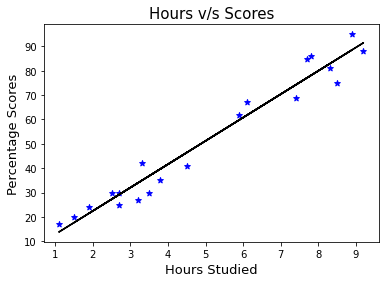

In [19]:
plt.scatter(X_train, y_train, color = "blue", marker = "*")
plt.plot(X_train, LReg.predict(X_train), color = "black")
plt.title("Hours v/s Scores",fontsize = 15)
plt.xlabel("Hours Studied", fontsize = 13)
plt.ylabel("Percentage Scores", fontsize = 13)
plt.show()

### Regression Evaluation Matrics

In [20]:
from sklearn import metrics

In [21]:
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error :  5.335972560068598


In [22]:
print('Mean Squared Error : ', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error :  29.38403434490335


In [23]:
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error :  5.420704229609226


### Accuracy of the model

In [24]:
metrics.r2_score(y_test,y_pred)

0.9098206655263217


### Predcting the score

In [25]:
study_hour=9.25
Prediction_score = LReg.predict([[study_hour]]).round(2)
print('Predicted score if a student study for 9.25 hours in a day :',Prediction_score)

Predicted score if a student study for 9.25 hours in a day : [91.96]
